Populating the interactive namespace from numpy and matplotlib
typeCode:  1
typeSize:  4
shape:  (1, 1001, 1001)
numOfArrays:  4
shape:  (1001, 1001)


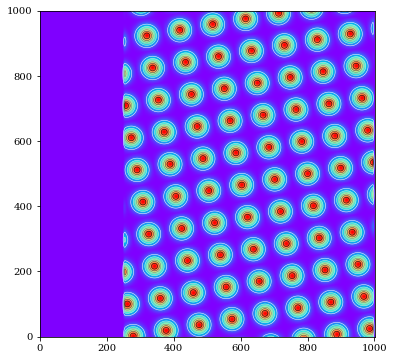

In [11]:
## plot plasma density

%pylab inline
import numpy as np
from matplotlib import pyplot as plt

from ReadBinary import *

fileSuffix = "-10"
folder = "../data/LargePeriodicLattice-GaussianPlasma/fp=1THz/"
#folder = "../data/2D/"
filename = folder+"Wp2-x{}.data".format(fileSuffix)
arrayInfo = GetArrayInfo(filename)

print("typeCode: ", arrayInfo["typeCode"])
print("typeSize: ", arrayInfo["typeSize"])
print("shape: ", arrayInfo["shape"])
print("numOfArrays: ", arrayInfo["numOfArrays"])

Wp2 = GetArrays(filename, 0, 1)[0,0,:,:]
print("shape: ", Wp2.shape)

shape = Wp2.shape

plt.figure(figsize=(6, 6*(shape[0]/shape[1])))
plt.imshow(np.real(Wp2[:,:]), cmap="rainbow", origin='lower', aspect='auto')
plt.contour(np.real(Wp2[:,:]), cmap="Greys", linewidths=0.5)
plt.show()


In [15]:
## animate Electric field

%pylab tk
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from ReadBinary import *

filename = folder+"E-x{}.data".format(fileSuffix)
arrayInfo = GetArrayInfo(filename)

print("typeCode: ", arrayInfo["typeCode"])
print("typeSize: ", arrayInfo["typeSize"])
print("shape: ", arrayInfo["shape"])
print("numOfArrays: ", arrayInfo["numOfArrays"])

E = GetArrays(filename, indStart=0, indEnd=None)[:, 0, :, :]
print("shape: ", E.shape)

shape = E.shape[1:]
print("Max E: ", np.max(np.abs(E)))

animate = True
save_animation = True

if animate:
    def animate_E(n):
        plt.clf()
        fig = plt.imshow(np.real(E[n, :,:]), cmap="rainbow", origin='lower', aspect='auto')
        plt.colorbar()
        plt.contour(np.real(Wp2[:,:]), cmap="Greys", linewidths=0.5)
        plt.xticks([])
        plt.yticks([])
        plt.pause(0.05)
        
        return fig
    
    if not save_animation:
        plt.ion()
        plt.figure(figsize=(7,6*(shape[0]/shape[1])))

        for n in range(E.shape[0]):
            animate_E(n)
    else:
        fig = plt.figure(figsize=(7,6*(shape[0]/shape[1])))
        anim = animation.FuncAnimation(fig, animate_E, frames=E.shape[0], interval=1, repeat=False)
        anim.save(folder + 'Efield-anim.mp4', writer="ffmpeg", fps=15, dpi=200)


Populating the interactive namespace from numpy and matplotlib
typeCode:  1
typeSize:  4
shape:  (1, 1001, 1001)
numOfArrays:  25


/home/nima/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


shape:  (25, 1001, 1001)
Max E:  1.9824451


Populating the interactive namespace from numpy and matplotlib


/home/nima/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


shape:  (2401, 1001, 1)


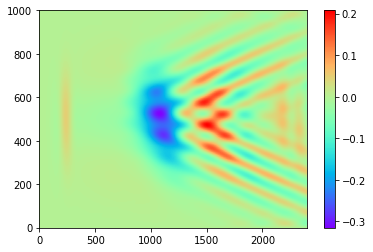

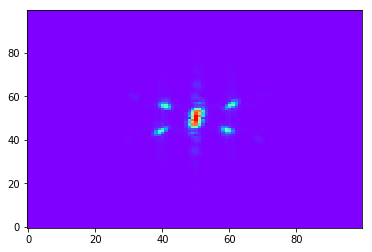

In [15]:
%pylab inline

E = GetArrays(folder+"E-x-slice{}.data".format(fileSuffix), indStart=0, indEnd=None)[:, 0, :, :]
print("shape: ", E.shape)

shape = E.shape[1:]
E_ty = E[:, :, 0]

plt.imshow(np.real(E_ty).T, cmap="rainbow", origin='lower', aspect='auto')
plt.colorbar()
plt.show()

Nt, Ny = E_ty.shape
N_pts = 50
E_f_ty = np.fft.fftshift(np.fft.fft2(E_ty))[Nt//2-N_pts:Nt//2+N_pts, Ny//2-N_pts:Ny//2+N_pts]

plt.imshow(np.abs(E_f_ty), cmap="rainbow", origin='lower', aspect='auto')
plt.show()


Populating the interactive namespace from numpy and matplotlib


/home/nima/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


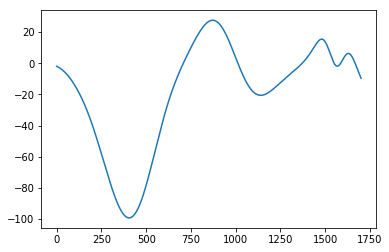

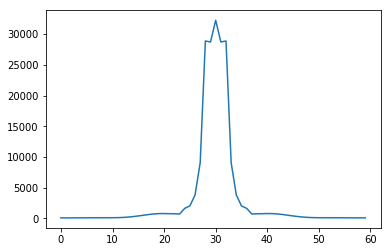

In [16]:
%pylab inline

plt.figure()
E_t = np.sum(E_ty, axis=1)[700:]
plt.plot(E_t)
plt.show()

Nt = len(E_t)
N_pts = 30

plt.figure()
E_f_t = np.fft.fftshift(np.fft.fft(E_t))[Nt//2-N_pts:Nt//2+N_pts]
plt.plot(np.abs(E_f_t))
plt.show()


/home/nima/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


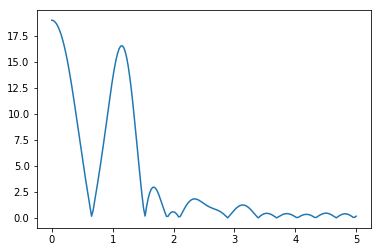

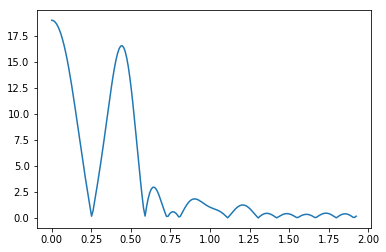

In [17]:
Nw = 200
w_max = 5

w = np.linspace(0, w_max, Nw)
dt = 0.01*0.95/np.sqrt(2.0)

Nt = len(E_t)
t = np.linspace(0, Nt*dt, Nt)

E_f_t = np.zeros(Nw, dtype=complex)

for i in range(len(w)):
    w_i = w[i]
    E_f_t[i] = np.sum(E_t * np.exp(-1j*w_i*t))/Nt


plot(w, np.abs(E_f_t))
show()

from scipy import constants
pitch = 124
plot(w*(constants.c/(pitch*constants.micro))/constants.tera/(2.0*np.pi), np.abs(E_f_t))
show()


Populating the interactive namespace from numpy and matplotlib
['-0', '-1', '-10', '-11', '-12', '-13', '-14', '-15', '-16', '-17', '-18', '-19', '-2', '-20', '-21', '-22', '-23', '-24', '-25', '-26', '-27', '-28', '-29', '-3', '-30', '-31', '-32', '-33', '-34', '-35', '-36', '-37', '-38', '-39', '-4', '-40', '-41', '-42', '-43', '-44', '-5', '-6', '-7', '-8', '-9']
[0.0, 1.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 2.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 3.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 4.0, 40.0, 41.0, 42.0, 43.0, 44.0, 5.0, 6.0, 7.0, 8.0, 9.0]
['-0', '-1', '-2', '-3', '-4', '-5', '-6', '-7', '-8', '-9', '-10', '-11', '-12', '-13', '-14', '-15', '-16', '-17', '-18', '-19', '-20', '-21', '-22', '-23', '-24', '-25', '-26', '-27', '-28', '-29', '-30', '-31', '-32', '-33', '-34', '-35', '-36', '-37', '-38', '-39', '-40', '-41', '-42', '-43', '-44']
Nt: 2401, Ny: 1001


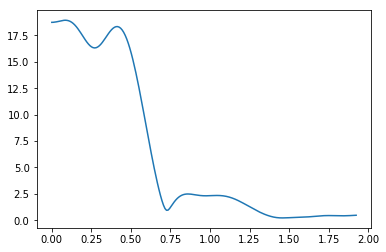

-0 -1 -2 -3 -4 -5 -6 -7 -8 -9 -10 -11 -12 -13 -14 -15 -16 -17 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35 -36 -37 -38 -39 -40 -41 -42 -43 -44 

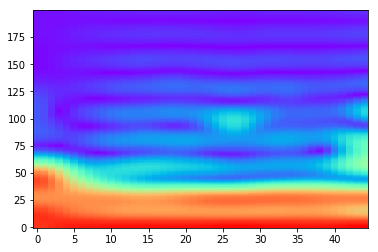

In [1]:
%pylab inline

import numpy as np
from matplotlib import pyplot as plt
import os
from scipy import constants
from ReadBinary import *

folder = "../data/LargePeriodicLattice-GaussianPlasma/fp=1THz/"
file_list = os.listdir(folder)
suffixes = sorted([f[9:f.find(".data")] for f in file_list if "slice" in f])
print(suffixes)

angles = [float(sfx[1:]) for sfx in suffixes]
print(angles)

sorted_keys = sorted(range(len(angles)), key=lambda k: angles[k])
suffixes = [suffixes[i] for i in sorted_keys]
print(suffixes)

filename = folder+"E-x-slice{}.data".format(suffixes[0])
arrayInfo = GetArrayInfo(filename)
Ny = arrayInfo["shape"][1]
Nt = arrayInfo["numOfArrays"]

print("Nt: {}, Ny: {}".format(Nt, Ny))

Nw = 200
def get_spectrum_si(E_t):
    w_max = 5

    w = np.linspace(0, w_max, Nw)
    dt = 0.01*0.95/np.sqrt(2.0)

    Nt = len(E_t)
    t = np.linspace(0, Nt*dt, Nt)

    E_f_t = np.zeros(Nw, dtype=complex)
    for i in range(len(w)):
        w_i = w[i]
        E_f_t[i] = np.sum(E_t * np.exp(-1j*w_i*t))/Nt

    pitch = 124
    f_si = w*(constants.c/(pitch*constants.micro))/constants.tera/(2.0*np.pi)
    return f_si, E_f_t

E = GetArrays(folder+"E-x-slice{}.data".format(suffixes[0]), indStart=0, indEnd=None)[:, 0, :, :]
E_ty = E[:, :, 0]
E_t = np.sum(E_ty, axis=1)[700:]

f_si, E_f_t = get_spectrum_si(E_t)

plot(f_si, np.abs(E_f_t))
show()

n_files = len(suffixes)
gap_spec = np.zeros((Nw, n_files), dtype=complex)

for i in range(n_files):
    E = GetArrays(folder+"E-x-slice{}.data".format(suffixes[i]), indStart=0, indEnd=None)[:, 0, :, :]
    E_ty = E[:, :, 0]
    E_t = np.sum(E_ty, axis=1)[700:]

    f_si, E_f_t = get_spectrum_si(E_t)
    gap_spec[:, i] = E_f_t
    print(suffixes[i], end=" ")

imshow(np.abs(gap_spec), cmap="rainbow", origin='lower', aspect='auto')


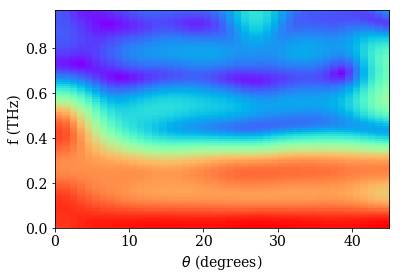

In [10]:
font = {'family' : 'serif', 'weight' : 'normal', 'size' : 14}
matplotlib.rc('font', **font)

imshow(np.abs(gap_spec[0:100,:]), cmap="rainbow", interpolation=None, origin='lower', aspect='auto', \
       extent=[0, 45, 0, f_si[100]], vmax=None)
#contour(np.abs(gap_spec[0:100,:]), extent=[0, 45, 0, f_si[100]])

xlabel(r"$\theta$ (degrees)")
ylabel(r"f (THz)")

savefig(folder+'E-r-spectrum.png', bbox_inches='tight', pad_inches=0.5)